## Import Package

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from operator import itemgetter
from time import time
from sklearn import tree

## Error Visible Calculation

In [2]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

## Input Data

In [3]:
train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('new_case')
test_labels = test_features.pop('new_case')

stats.describe(test_labels)

DescribeResult(nobs=170144, minmax=(-734, 4178), mean=12.02298053413579, variance=4381.956155387596, skewness=23.150131994394677, kurtosis=834.3236162937388)

## Linear Regression

In [4]:
reg = LinearRegression().fit(train_features ,train_labels)
s_linear_reg = r2_score(train_labels,reg.predict(train_features))
s_linear_reg_test = r2_score(test_labels,reg.predict(test_features))
print(s_linear_reg,s_linear_reg_test)
print(mean_squared_error(train_labels,reg.predict(train_features)),mean_squared_error(test_labels,reg.predict(test_features)))

0.6169138354205805 0.7638875503481404
1916.3791702728342 1034.6283211818004


In [5]:
stats.describe(reg.predict(test_features))

DescribeResult(nobs=170144, minmax=(-1263.5963214577762, 3477.3728692779378), mean=12.112410649844819, variance=3085.673759958532, skewness=20.098551267415026, kurtosis=631.8538369064017)

## Lasso Regression

In [6]:
reg = Lasso().fit(train_features ,train_labels)
s_Lasso_reg = r2_score(train_labels,reg.predict(train_features))
s_Lasso_reg_test = r2_score(test_labels,reg.predict(test_features))
print(s_Lasso_reg,s_Lasso_reg_test)
print(mean_squared_error(train_labels,reg.predict(train_features)),mean_squared_error(test_labels,reg.predict(test_features)))

0.6160411738672797 0.7631569890197889
1920.7446383530498 1037.8295900762917


## Decision_tree_regression

In [7]:
reg = DecisionTreeRegressor(max_depth=25)
reg.fit(train_features ,train_labels)
s_DT_reg = r2_score(train_labels,reg.predict(train_features))
s_DT_reg_test = r2_score(test_labels,reg.predict(test_features))
print(s_DT_reg,s_DT_reg_test)

0.9959712273700418 0.5695825689381426


Seems Decision Tree Regression much better 
## Decision Tree Regression depth study  k-folder cross-validation

In [9]:
dt_old = DecisionTreeRegressor()
dt_old.fit(train_features, train_labels)
scores = cross_val_score(dt_old, train_features, train_labels, cv=10)
print("Total sample accuracy mean: {:.3f} (std: {:.3f})".format(scores.mean(),scores.std()),end="\n\n" )

Total sample accuracy mean: 0.313 (std: 0.464)



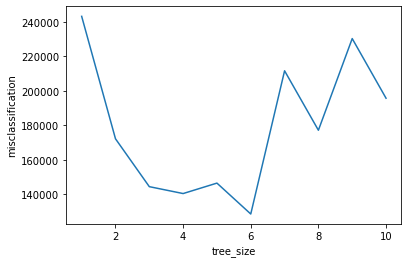

In [15]:
misclassification = []
for i in range(1,11):
    #print(i)
    parameters = {'max_depth':range(i,i+1)}
    clf = GridSearchCV(tree.DecisionTreeRegressor(), parameters, n_jobs=4)
    clf.fit(train_features, train_labels)
    tree_model = clf.best_estimator_
    misclassification.append(clf.best_score_)
for i in range(len(misclassification)):
    misclassification[i] = int((1-misclassification[i])*len(train_features))
    
#print(misclassification)
tree_size = [1,2,3,4,5,6,7,8,9,10]

plt.plot(tree_size, misclassification)
plt.xlabel('tree_size')
plt.ylabel('mistake')
plt.show()

when tree_size too large, there will be overfit, so max_depth = 6 is good 

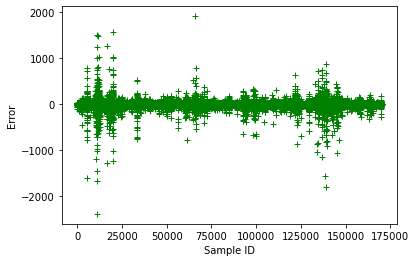

DescribeResult(nobs=170144, minmax=(0.035427807486627216, 2387.5263157894738), mean=6.8863923051366145, variance=906.2438408515955, skewness=24.06783822128234, kurtosis=998.4457537305493)

In [18]:
reg = DecisionTreeRegressor(max_depth=6)
reg.fit(train_features ,train_labels)
test_predict = reg.predict(test_features)
#test_labels = test_labels.to_numpy()

error,abserror = errorCalculate(test_labels,test_predict)
plt.plot(error,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(abserror)

In [19]:
r2_score(test_labels,reg.predict(test_features))

0.7823651162323597

In [20]:
mean_squared_error(test_labels,reg.predict(test_features))

953.6609134974362

# save_models

In [21]:
filename = 'covid_DecisionTreeRegression.sav'
joblib.dump(reg, filename)
 

['covid_DecisionTreeRegression.sav']